Professor Wu

DS 4400: Machine Learning I

Ryan Tietjen

10/02/24

**Assignment 3**

## Question 1. (10 points) In the data folder, find and load the 2 files
stock_prediction_data.csv
stock_price.csv

This data predicts tomorrow’s stock price difference given the previous day’s data.
1) Use Preprocessing on the data
2) Perform regression on this dataset\
(a) Solve it with Sklearn library for linear regression.\
(b) Solve it by writing your own gradient descent algorithm in Python.\
(c) Solve it by writing your own closed-form solution in Python.\
(d) Print out the final total error for each method.\
(e) No need to include this portion in the homework, but do it for your own sanity check.\
• Print out the prediction of your function for every sample next to the true label\
• Compare them against the true labels. How good is your prediction?\

In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from numpy import hstack
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy.random import randn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Load Data & Perform Preprocessing

In [2]:
X = genfromtxt('stock_prediction_data_scaled.csv', delimiter = ',')
y = genfromtxt('stock_price.csv', delimiter = ',')
y = y.reshape(len(y), 1)

In [3]:
X = preprocessing.scale(X)
y = preprocessing.scale(y)

In [4]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


## (a) Solve with sklearn

In [5]:
reg = LinearRegression().fit(X, y)
w = reg.coef_

In [6]:
print("MSE: ", np.round(mse(y, reg.predict(X)), 10))

MSE:  0.0008483577


## (b) Solve with Gradient Descent

In [7]:
def f(w, X, y):
    num = 0
    n = X.shape[0]
    d = X.shape[1]
    for xi, yi in zip(X,y):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)**2
    return (num / n).item()

In [8]:
def f_dx(w, X, y):
    num = 0
    n = X.shape[0]
    d = X.shape[1]
    for xi, yi in zip(X,y):
        xi = np.reshape(xi, (d,1))
        num += (w.T.dot(xi) - yi)*(xi)
    return (2/n) * num

In [9]:
f_value_list = []
lr = 0.01
d = X.shape[1]
w = randn(d,1)
for i in range(200):
    w = w - lr * f_dx(w, X, y)
    f_value_list.append(f(w, X, y))

MSE:  0.0076164263


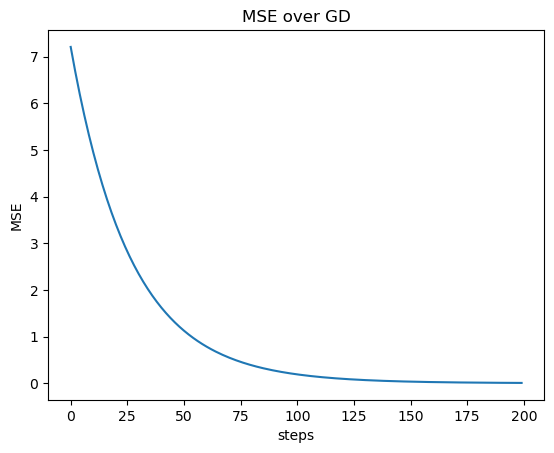

In [10]:
plt.plot(f_value_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
print("MSE: ", np.round(f_value_list[-1], 10))
plt.show()

## (c) Solve with Closed Form Solution

In [11]:
ones = np.ones((X.shape[0], 1))
phi = np.hstack((X, ones))
w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)

In [12]:
print("MSE: ", np.round(mse(y, phi.dot(w)), 10))

MSE:  0.0008483577


## Question 2. (10 points) Repeat the previous question but this time use Polynomial regression (2nd order).

## (a) Solve with sklearn

In [13]:
poly = PolynomialFeatures(2)
polyX = poly.fit_transform(X)
reg = LinearRegression().fit(polyX, y)
print("MSE: ", np.round(mse(y, reg.predict((polyX))), 10))

MSE:  0.0006914124


## (b) Solve with Gradient Descent

In [14]:
lr = 0.001
poly = PolynomialFeatures(2)
phi = poly.fit_transform(X)
n = phi.shape[0]
d = phi.shape[1]
w = randn(d,1)

In [15]:
mse_list = []
for i in range(2500):
    w = w - lr * f_dx(w, phi, y)
    mse_list.append(f(w, phi, y))

MSE:  0.0076164263


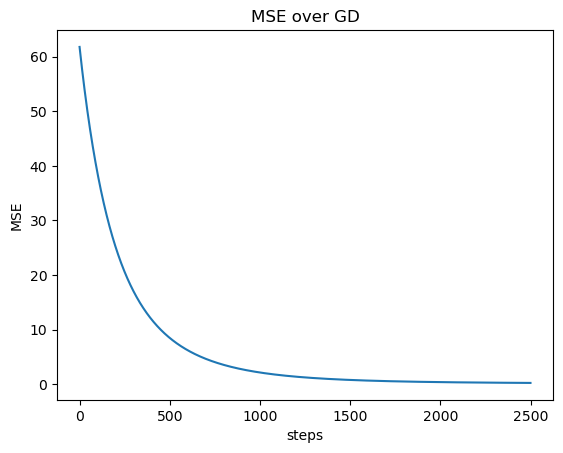

In [16]:
plt.plot(mse_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
print("MSE: ", np.round(f_value_list[-1], 10))
plt.show() 

## (c) Closed Form Solution

In [17]:
phi = poly.fit_transform(X)
w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
print("MSE: ", np.round(mse(y, phi.dot(w)), 10))

MSE:  0.0006914124


## Question 3. (10 points) Given the data

$
\begin{bmatrix}
    x & y \\
    0 & 1 \\
    1 & 0 \\
    2 & 2 \\
    3 & -2
\end{bmatrix}
$

If we assume that the function to predict y from x is a linear function then the function would like.

$f(x) = ax + b$

The goal is to use the data to identify the best a and b using the Closed-Form solution. Solve the question by
hand as well as using Python.

$w = (\phi ^T \phi)^{-1}\phi ^Ty$

$\phi ^T \phi = 
\begin{bmatrix}
    0 & 1 & 2 & 3 \\
    1 & 1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
    0 & 1 \\
    1 & 1 \\
    2 & 1 \\
    3 & 1
\end{bmatrix} = 
\begin{bmatrix}
    0 \cdot 0 + 1 \cdot 1 + 2 \cdot 2 + 3 \cdot 3 & 0 \cdot 1 + 1 \cdot 1 + 2 \cdot 1 + 3 \cdot 1 \\
    1 \cdot 0 + 1 \cdot 1 + 1 \cdot 2 + 1 \cdot 3 & 1 \cdot 1 + 1 \cdot 1 + 1 \cdot 1 + 1 \cdot 1
\end{bmatrix} = 
\begin{bmatrix}
    14 & 6 \\
    6 & 4
\end{bmatrix}
$

$
(\phi ^T \phi) ^{-1} = 
\frac{1}{14 \cdot 4 - 6 \cdot 6} 
\begin{bmatrix}
    4 & -6 \\
    -6 & 14
\end{bmatrix} = 
\begin{bmatrix}
    0.2 & -0.3 \\
    -0.3 & 0.7
\end{bmatrix}
$

$
(\phi ^T \phi) ^{-1} \phi ^T =
\begin{bmatrix}
    0.2 & -0.3 \\
    -0.3 & 0.7
\end{bmatrix}
\begin{bmatrix}
    0 & 1 & 2 & 3 \\
    1 & 1 & 1 & 1
\end{bmatrix} = 
\begin{bmatrix}
    -0.3 & 0.2 - 0.3 & -0.4 - 0.3 & 0.6 - 0.3 \\
    0.7 & -0.3 + 0.7 & -0.6 + 0.7 & -0.9 + 0.7
\end{bmatrix} = 
\begin{bmatrix}
    -0.3 & -0.1 & 0.1 & 0.3 \\
    0.7 & 0.4 & 0.1 & -0.2
\end{bmatrix}
$

$
(\phi ^T \phi)^{-1}\phi ^Ty = 
\begin{bmatrix}
    -0.3 & -0.1 & 0.1 & 0.3 \\
    0.7 & 0.4 & 0.1 & -0.2
\end{bmatrix}
\begin{bmatrix}
    1 \\
    0 \\ 
    2 \\
    -2 
\end{bmatrix} = 
\begin{bmatrix}
    -0.3 + 0.2 - 0.6 \\
    0.7 + 0.2 + 0.4 \\
\end{bmatrix} =
\boxed{
\begin{bmatrix}
    -0.7 \\
    1.3
\end{bmatrix} \hspace{1cm}
a = -0.7 \hspace{1cm}
b = 1.3}
$

In [18]:
x = np.array([[0],
              [1],
              [2],
              [3]])

y = np.array([[1],
              [0],
              [2],
              [-2]])

ones = np.ones((4, 1))
phi = np.hstack((x, ones))
w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
print("a: ", w[0])
print("b: ", w[1])
print(f"Solution: f(x) = {w[0]}x + {w[1]}")

a:  [-0.7]
b:  [1.3]
Solution: f(x) = [-0.7]x + [1.3]


## Question 4. (20 points)
Let’s say we have some $x =
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}
$
, and the feature maps are

1) $\phi_1(x) = x_1$

2) $\phi_2(x) = x_2$

3) $\phi_3(x) = x_1x_2^2$

4) $\phi_3(x) = x_1^3$

5) $\phi_3(x) = x_2^2$

4) $\phi_6(x) = 1$

Given the following data

$
\begin{bmatrix}
    x_1 & x_2 \\
    0 & 2 \\
    2 & -1 \\
    -2 & 1 \\
    3 & 3 \\
    4 & 1 \\
\end{bmatrix}
$

Transform the data using the feature map

$
\begin{bmatrix}
    \phi_1 & \phi_2 & \phi_3 & \phi_4 & \phi_5 & \phi_6 \\
    0 & 2 & 0 & 0 & 4 & 1\\
    2 & -1 & 2 & 8 & 1 & 1\\
    -2 & 1 & -2 & -8 & 1 & 1\\
    3 & 3 & 27 & 27 & 9 & 1\\
    4 & 1 & 4 & 64 & 1 & 1\\
\end{bmatrix}
$

## Question 5. (10 points) Given the probability table below where X represents the probability of you having a good or bad date and Y represents the potential topics you could talk about during a date.

$
\begin{bmatrix}
    & x = good & x = bad \\
    y = ex & 0 & 0.1 \\
    y = food & 0.4 & 0.1 \\
    y = travel & 0.2 & 0.1 \\
    y = weather & 0.0 & 0.1 \\
\end{bmatrix}
$

## 1) What is the probability of having a good date? bad date?

$P(x = good) = 0.4 + 0.2 = \boxed{0.6}$

$P(x = bad) = 0.1 + 0.1 + 0.1 + 0.1 = \boxed{0.4}$

## 2) What is the probability that you would talk about food and have a good date?

$P(y = food \cap x = good) = \boxed{0.4}$

## 3) What is the probability of you talking about food or travel?

$P(y = food \cup y = travel) = 0.4 + 0.1 + 0.2 + 0.1 = \boxed{0.8}$

## 4) What is the probability of you talking about travel or having a good date?

$P(y = travel \cup x = good) = P(y = travel) + P(x = good) - P(y = travel \cap x = good)
= 0.6 + 0.3 - 0.2 = \boxed{0.7} $

## 5) What is the probability of you having a bad date given you talk about your ex the whole time?

$P(x = bad | y = ex) = \frac{P(x = bad \cap y = ex)}{P(y = ex)} = \frac{0.1}{0.1} = \boxed{1}$

## 6) What is the probability of you having a good date given that you talk about the weather?

• Solve this problem with conditional probability.

• Solve this problem using Bayes’ Rule.

• Note: The solution should be identical.

With conditional probabilitity:

$P(x = good | y = weather) = \frac{P(x = good \cap y = weather)}{P(y=weather)} =  \frac{0}{0.1} = \boxed{0}$

With Bayes' rule:

$P(x = good | y = weather) = \frac{P(y = weather | x = good)P(x = good)}{P(y = weather)} = \frac{0 \cdot 0.6}{0.1} = \boxed{0}$

## 7) Which topic should you talk about?

$P(x = good | y = food) = \frac{P(x = good \cap y = food)}{P(y = food)} = \frac{0.4}{0.5} = 0.8$

$P(x = good | y = travel) = \frac{P(x = good \cap y = travel)}{P(y = travel)} = \frac{0.2}{0.3} = 0.66$

Since 0.8 > 0.66 , you should talk about food

## Question 6. (10 points) Go to the data folder under ”probability distributions” and find the 3 csv file
SAT.csv

Lunch_wait_time.csv

Student_age.csv

For each file
1) Generate the histogram
2) Calculate the average value
3) Calculate the probability that someone scored higher than 1200 on SAT
4) Calculate the probability you have to wait more than 5 min.
5) Calculate the probability that someone is younger than 19.

In [19]:
lunch_wait_time = genfromtxt('lunch_wait_time.csv', delimiter = ',')
SAT = genfromtxt('SAT.csv', delimiter = ',')
student_age = genfromtxt('student_age.csv', delimiter = ',')

Average SAT:  1147.82875
Probability of a SAT > 1200:  0.3575


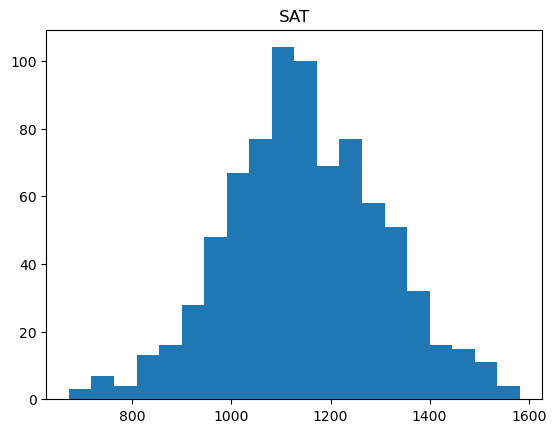

In [20]:
plt.hist(SAT, 20)
print("Average SAT: ", np.mean(SAT))
plt.title("SAT")
SAT_count = 0
for i in SAT:
    if i > 1200:
        SAT_count += 1
print("Probability of a SAT > 1200: ", SAT_count/len(SAT))
plt.show()

Average wait time:  1.0405
Probability of a wait time > 5 minutes:  0.005


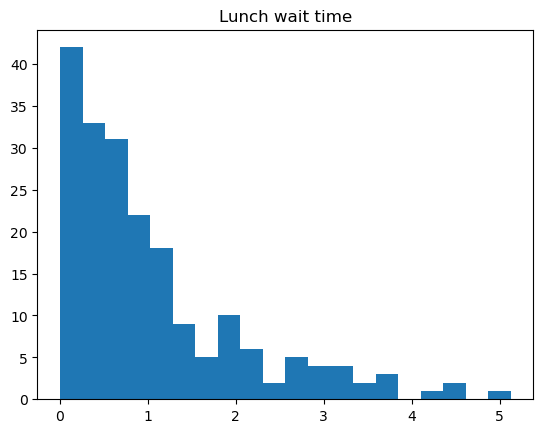

In [21]:
plt.hist(lunch_wait_time, 20)
plt.title("Lunch wait time")
print("Average wait time: ", np.mean(lunch_wait_time))
wait_time_count = 0
for i in lunch_wait_time:
    if i > 5:
        wait_time_count += 1
print("Probability of a wait time > 5 minutes: ", wait_time_count/len(lunch_wait_time))
plt.show()

Average age:  19.931625
Probability of someone being younger than 19:  0.34125


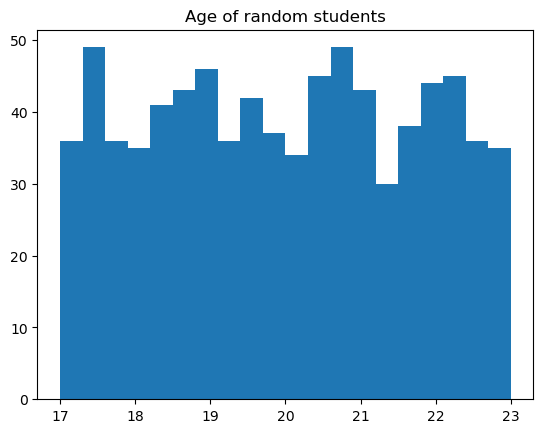

In [22]:
plt.hist(student_age, 20)
plt.title("Age of random students")
print("Average age: ", np.mean(student_age))
age_count = 0
for i in student_age:
    if i < 19:
        age_count += 1
print("Probability of someone being younger than 19: ", age_count/len(student_age))
plt.show()

## Question 7. (20pts) Given the following distribution

$
p(x) = 
\begin{cases} 
x^2 - x + 1 & \forall  0 \leq x \leq b \\
0 & \text{everywhere else} 
\end{cases}
$

Given that the total probability is always 1, it implies that the area between 0 and b must add up to 1, implying that the integral between 0 and b must therefore also add up to 1 where

$
\int_0^b x^2 - x + 1 dx = 1
$

### 1) Use Numpy to find the value of b?

$\int_0^b x^2 - x + 1 dx = 1 \implies \frac{x^3}{3} - \frac{x^2}{2} + x = 1 \implies \frac{x^3}{3} - \frac{x^2}{2} + x - 1 = 0$ 

In [23]:
roots = np.roots([0.333333, -0.5, 1, -1]) # 033333x^3 - 0.5x^2 + 1 - 1
print(roots) # We only want positive real roots
#https://numpy.org/doc/stable/reference/generated/numpy.isreal.html
#https://numpy.org/doc/stable/reference/generated/numpy.real.html
print("\nb: ", np.real(np.round(roots[np.isreal(roots)], 4)).item())

[0.1731741 +1.60326167j 0.1731741 -1.60326167j 1.15365329+0.j        ]

b:  1.1537


### 2) Solve the integral by hand and find the probability p(0 ≤ x ≤ 0.3).


$F(x) = \int_0^b x^2 - x + 1 dx = \frac{1}{3}x^3 - \frac{1}{2}x^2 + x + C$

$F(0.3) - F(0) = \frac{1}{3}(0.3)^3 - \frac{1}{2}(0.3)^2 + 0.3 - (0 - 0 + 0) = \boxed{0.264}$

## Question 8. (10 pts) Write out the entire derivation to show that

### 1) $\frac{1}{n} \sum_{i=1}^n (\phi (x_i)^T w - y_i)^2 = \frac{1}{n}(\Phi w - y)^2$ where $\Phi = 
\begin{bmatrix}
    \phi (x_1)^T \\
    \phi (x_2)^T \\
    ...
\end{bmatrix},
y = 
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ...
\end{bmatrix}
$

### 2) $\frac{d}{dw} \frac{1}{n} \sum_{i=1}^n (\phi (x_i)^T w - y_i)^2 = \frac{2}{n} \Phi ^ T(\Phi w - y)$ where $\Phi = 
\begin{bmatrix}
    \phi (x_1)^T \\
    \phi (x_2)^T \\
    ...
\end{bmatrix},
y = 
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ...
\end{bmatrix}
$

### 1)

$\frac{1}{n} \sum_{i=1}^n (\phi (x_i)^T w - y_i)^2$

= $\frac{1}{n} ((\phi (x_1)^T w - y_1)^2 + (\phi (x_2)^T w - y_2)^2 + ... + (\phi (x_n)^T w - y_n)^2)$

Since $(\phi (x_i)^T w - y_i)^2 = (\phi (x_i)^T w - y_i)(\phi (x_i)^T w - y_i)$, we get

$\frac{1}{n} ((\phi (x_1)^T w - y_1)(\phi (x_1)^T w - y_1) + (\phi (x_2)^T w - y_2)(\phi (x_2)^T w - y_2) + ...)$

$= 
\frac{1}{n}
\begin{bmatrix}
    (\phi (x_1)^T w - y_1)^T &
    (\phi (x_2)^T w - y_2)^T & 
    ...
\end{bmatrix}
\begin{bmatrix}
    (\phi (x_1)^T w - y_1)^T \\
    (\phi (x_2)^T w - y_2)^T \\
    ...
\end{bmatrix}
$

Using the second part of the hint hint, we get

$
\frac{1}{n}(\Phi w - y)^T(\Phi w - y) = \boxed{\frac{1}{n} (\Phi w - y)^2}
$ as required.

### 2)

let $g = \phi (x_i)^T w - y_i$

Then,

$\frac{1}{n} \sum_{i=1}^n (\phi (x_i)^T w - y_i)^2 = \frac{1}{n} \sum_{i=1}^n (g)^2$

So, 

$ \frac{d}{dw} \frac{1}{n} \sum_{i=1}^n (g)^2 = \frac{df}{dg} \frac{dg}{dw} $

Hence, we must find $\frac{df}{dg}$ and $\frac{dg}{dw}$

$\frac{df}{dg} = \frac{2}{n} \sum_i^n 2g$

$\frac{dg}{dw} = \phi (x_i)$

$\frac{df}{dg} \frac{dg}{dw} = \frac{2}{n} \sum_{i=1}^n (\phi (x_i)^T w - y_i) \phi (x_i)$

$= \frac{2}{n} (((\phi (x_1))(\phi (x_1)^T w - y_1) + ((\phi (x_2))(\phi (x_2)^T w - y_2) + ...)$

$= 
\frac{2}{n}
\begin{bmatrix}
    \phi(x_1) &
    \phi(x_2) &
    ...
\end{bmatrix}
\begin{bmatrix}
    \phi (x_1)^T w - y_1 \\
    \phi (x_2)^T w - y_2 \\ 
    ...
\end{bmatrix}
$

$
= \boxed{\frac{2}{n} \Phi ^T (\Phi w - y)}
$ as required.